In [13]:
import gdown 
import pandas as pd
from sklearn import metrics
gdown.download('https://drive.google.com/uc?id=1grV8hSxULsGvnbwEMPjPaknccfIOlcoB','cancer_data.csv',True);
data = pd.read_csv('cancer_data.csv')
data['diagnosis'].replace({'M':1, 'B':0}, inplace = True)
data.to_csv('cancer_data.csv')
del data

In [15]:
import os
import numpy as np
data_path = 'cancer.csv'
dataframe = pd.read_csv(data_path)
dataframe = dataframe[['diagnosis', 'radius_mean', 'area_mean','radius_se','area_se','smoothness_mean']]
#prints specific values 
dataframe.head()

,diagnosis,radius_mean,area_mean,radius_se,area_se,smoothness_mean
0,1,17.99,1001.0,1.0950,153.40,0.11840
1,1,20.57,1326.0,0.5435,74.08,0.08474
2,1,19.69,1203.0,0.7456,94.03,0.10960
3,1,11.42,386.1,0.4956,27.23,0.14250
4,1,20.29,1297.0,0.7572,94.44,0.10030


In [16]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   diagnosis        569 non-null    int64  
 1   radius_mean      569 non-null    float64
 2   area_mean        569 non-null    float64
 3   radius_se        569 non-null    float64
 4   area_se          569 non-null    float64
 5   smoothness_mean  569 non-null    float64
dtypes: float64(5), int64(1)
memory usage: 26.8 KB


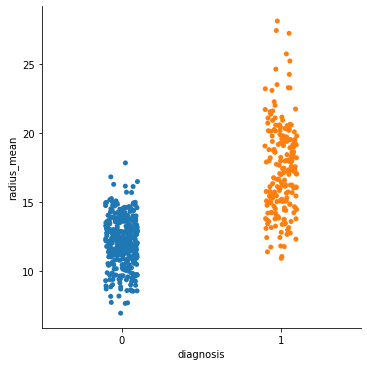

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.catplot(x = 'diagnosis', y ='radius_mean', data = dataframe)

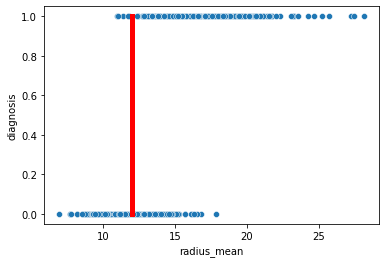

In [19]:
boundary = 12
sns.scatterplot(x = 'radius_mean', y = 'diagnosis', data = dataframe)
plt.plot([boundary, boundary], [0,1], 'r', linewidth = 5) #Draws the red line

In [20]:
#takes target boundary and sample array and categorizes point as Malignant or Benign by appending array that way
def boundary_classifier(target_boundary, x):
    dataArr = []
    for i in range(len(x)):
        if x[i] > target_boundary:
            dataArr.append(1)
        else:
            dataArr.append(0)
    return dataArr

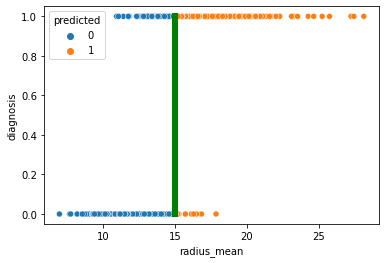

In [22]:
chosen_boundary = 15
y_pred = boundary_classifier(chosen_boundary, dataframe['radius_mean'])
dataframe['predicted'] = y_pred
y_true = dataframe['diagnosis']
sns.scatterplot(x = 'radius_mean', y = 'diagnosis', hue = 'predicted', data = dataframe)
plt.plot([chosen_boundary, chosen_boundary], [0, 1], 'g', linewidth = 6)


In [23]:
#computes subset accuracy using the true value and the predicted value 
accuracy = metrics.accuracy_score(y_true, y_pred)
accuracy

0.8892794376098418

Text(0.5, 257.44, 'Predicted diagnosis')

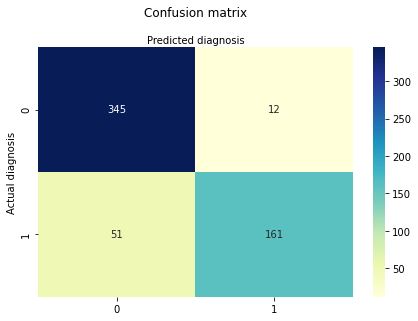

In [24]:
from sklearn import metrics
#creating the confusion matrix 
#confusion matrix info: https://towardsdatascience.com/understanding-confusion-matrix-a9ad42dcfd62
y_test = dataframe['diagnosis']
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
#visualizing the CFM
class_names = [0,1]
fig, ax = plt.subplots()
# Setting up and visualizing the plot (do not worry about the code below!)
tick_marks = np.arange(len(class_names)) 
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g') # Creating heatmap
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y = 1.1)
plt.ylabel('Actual diagnosis')
plt.xlabel('Predicted diagnosis')


In [25]:
def confusionMatStats(y_test, y_pred):
    accuracy = metrics.accuracy_score(y_test, y_pred)
    #out of all cases how much we predicted correctly
    precision = metrics.precision_score(y_test,y_pred)
    #of of all + cases we have predicted correctly, how many are actually positive
    recall = metrics.recall_score(y_test,y_pred)
    #out of all the positive cases, how much we predicted correctly
    print(accuracy)
    print(precision)
    print(recall)
confusionMatStats(y_test,y_pred)

0.8892794376098418
0.930635838150289
0.7594339622641509
